Question 2 (5%) Control with Function Approximation

Question 2 - a

In [ ]:
import numpy as np

def greedyPolicy(x, W):
    """
    Greedy policy function that selects the action with the highest estimated action value and returns the integer of the index.

    Parameters:
    - x: State features, numpy array of shape (d, 1)
    - W: Parameters of the learned stacked parameters, numpy array of shape (d, |A|)

    Returns:
    - a: Greedy action index (0-based)
    """
    # Calculate estimated action values
    action_values = np.dot(W.T, x).flatten()

    # Select the action with the highest estimated action value (greedy action)
    greedy_action = np.argmax(action_values)

    return greedy_action

In [ ]:
# Import necessary libraries
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

def render_env(env_name, featurizer, W, policy_func):
    env = gym.make("MountainCar-v0",render_mode="rgb_array").env
    observation, info = env.reset(seed=42)
    plt.figure(3)
    plt.clf()

    while True:
        rgb_array = env.render()
        plt.imshow(rgb_array)
        plt.axis('off')  # Turn off axis
        #plt.show()  # Display the image

        observation = featurizer.featurize(observation)
        action = policy_func(observation, W)
        display.clear_output(wait=True)
        display.display(plt.gcf())
        observation, reward, terminated, truncated, info = env.step(action)
        if terminated or truncated:
            break
    env.close()
    return


Question 2- b

In [ ]:
import numpy as np

def QLearningFA(env, featurizer, eval_func, gamma=0.99, step_size=0.005, epsilon=0.1, max_episodes=400, evaluate_every=20):
    # Initialize parameters W
    num_features = featurizer.n_features
    num_actions = env.action_space.n

    W = np.zeros((num_features, num_actions))

    eval_returns = []

    for i in range(1, max_episodes + 1):
        s, info = env.reset()
        s = featurizer.featurize(s)  # convert to a feature vector
        terminated = truncated = False

        while not (terminated or truncated):
            # Compute Q-values and choose action
            q_values = np.dot(s, W)
            if np.random.rand() < epsilon:
                action = np.random.choice(num_actions)  # Exploration
            else:
                action = np.argmax(q_values)  # Exploitation

            # Take action and observe next state and reward
            next_s, reward, terminated,truncated, info = env.step(action)
            next_s = featurizer.featurize(next_s)

            # Compute TD target
            next_q_values = np.dot(next_s, W)
            td_target = reward + gamma * np.max(next_q_values)

            # Compute TD error
            td_error = td_target - q_values[action]

            # Update weights
            W[:, action] += step_size * td_error * s

            s = next_s

        if i % evaluate_every == 0:
            eval_return = eval_func(env, featurizer, W, greedyPolicy)
            eval_returns.append(eval_return)

    return W, eval_returns


Question 2 - c

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def runQLExperiments(env, featurizer, eval_func):
    def repeatExperiments(step_size):
        eval_returns_step_sizes = np.zeros([n_runs, n_eval])
        for r in range(n_runs):
            W, eval_returns = QLearningFA(env,
                                          featurizer,
                                          eval_func,
                                          step_size=step_size,
                                          max_episodes=max_episodes,
                                          evaluate_every=evaluate_every)
            eval_returns_step_sizes[r] = eval_returns
        # Compute and return the average evaluated returns over runs
        return np.mean(eval_returns_step_sizes, axis=0)

    n_runs = 10
    max_episodes = 400
    evaluate_every = 20
    n_eval = max_episodes // evaluate_every  # num of evaluation during training
    step_size_list = [0.0005, 0.001, 0.005, 0.01]  # QL
    results = np.zeros([len(step_size_list), n_eval])

    # Call repeatExperiments() with different step_size in the step_size_list.
    # Save the results to the 'results' array.
    for idx, step_size in enumerate(step_size_list):
        results[idx] = repeatExperiments(step_size)

    plt.figure()
    # Plot the results of different step sizes (with proper legend)
    # - x-axis is the number of evaluation steps
    # - y-axis is the evaluated returns
    # - The plot should have four training curves, showing the performance
    # - during training when using different step sizes.
    for idx, step_size in enumerate(step_size_list):
        plt.plot(np.arange(n_eval) * evaluate_every, results[idx], label=f'Step Size: {step_size}')

    plt.legend()
    plt.xlabel('Number of Evaluation Steps')
    plt.ylabel('Evaluated Returns')
    plt.savefig('QL_plot.png')

    return results


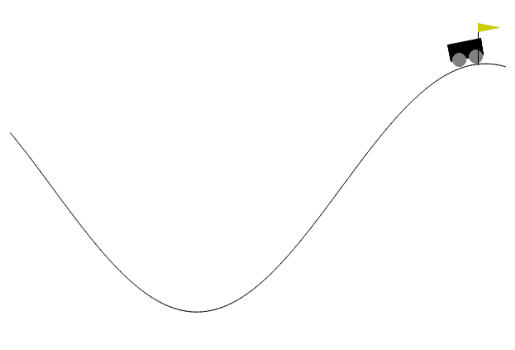

Learned parameters W : 
[[ 0.00886455 -0.4528667  -0.20574304]
 [-2.36106656 -2.022142   -2.43092555]
 [ 1.51542272  1.61201927  1.95585944]
 [-1.09165656 -1.04296763 -0.85958939]
 [-3.66917587 -3.97604425 -4.31877709]
 [-1.18736835 -1.37669699 -1.95346647]
 [-3.1584476  -2.73874621 -2.16358715]
 [ 0.12746044 -0.45257217 -0.34666814]
 [ 0.14050171 -0.19683002 -0.02225966]
 [ 0.39552434 -0.13279625  0.08129312]
 [ 0.54335995 -0.28400719  0.01297886]
 [-3.65965269 -3.723911   -3.79037803]
 [-4.09153381 -3.74269472 -3.77397184]
 [-0.14138641 -0.18367162 -0.01284146]
 [ 0.60592756  0.79511675  0.90449408]
 [-3.67076594 -3.81766705 -3.98602752]
 [-0.59692501 -0.87116322 -0.92032111]
 [-2.1188315  -2.17157567 -2.2362378 ]
 [-1.46221842 -1.23404619 -1.3105347 ]
 [ 0.62924284 -0.2601205   0.02782065]
 [ 0.03255259 -0.05586215 -0.05699837]
 [ 0.32787797 -0.08795039  0.08655778]
 [-0.18561173 -1.2027895  -0.84287309]
 [ 0.39562322 -0.13751868  0.04153443]
 [ 0.61561558 -0.60861824 -0.31967559]
 

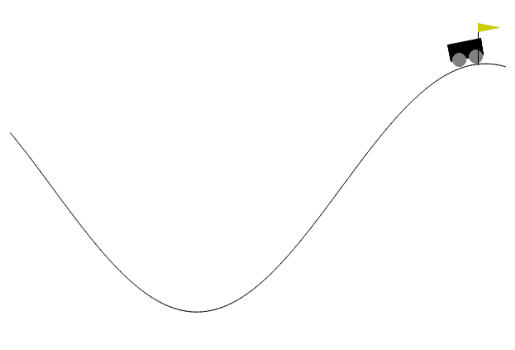

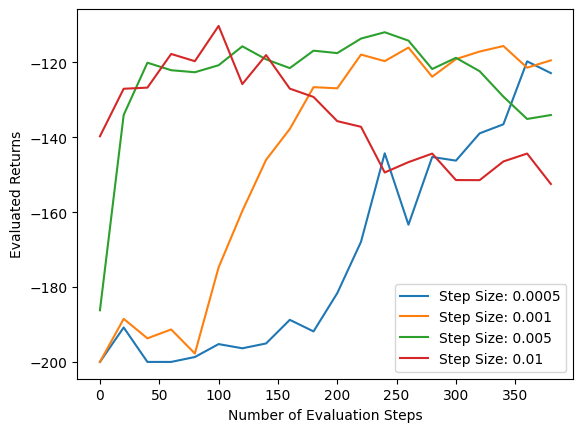

In [ ]:
if __name__ == "__main__":
    _Q2test()

Question 3 - Actor-Critic with Discrete Action
Space

Question 3 - a - softmaxProb

In [ ]:
import numpy as np
#import jax.numpy as np
def softmaxProb(x, Theta):

    """
    Compute softmax probabilities over actions given state features and actor parameters.

    Args:
    - x: State features, numpy array of shape (d,)
    - Theta: Actor parameters, numpy array of shape (d, |A|)

    Returns:
    - probs: Softmax probabilities over actions, numpy array of shape (|A|,)
    """
    preferences = np.dot(x.T,Theta)
    max_preference = np.max(preferences)
    exp_preferences = np.exp(preferences - max_preference)  # for numerical stability

    # Compute softmax probabilities with the given equation
    probs = (exp_preferences) / np.sum(exp_preferences)
    return probs

Question 3 - b - softmaxPolicy

In [ ]:
import numpy as np

def softmaxPolicy(x, Theta):

    preferences = np.dot(x.T, Theta)
    max_preference = np.max(preferences)
    exp_preferences = np.exp(preferences - max_preference)  # for numerical stability

    # Compute softmax probabilities with the given equation
    probs = (exp_preferences) / np.sum(exp_preferences)

    # Sample an action from the computed probabilities
    action = np.random.choice(len(probs), p=probs)
    return action


Question 3 - c - logSoftmaxPolicyGradient

In [ ]:
def logSoftmaxPolicyGradient(x, a, Theta):
    #import jax.numpy as np
    import numpy as np
    """
    Compute the gradient of log softmax policy w.r.t. the parameters Theta.

    Args:
    - x: State features, numpy array of shape (d,)
    - a: Integer action index
    - Theta: Actor parameters, numpy array of shape (d, |A|)

    Returns:
    - gradient: Gradient of log softmax policy w.r.t. Theta, numpy array of shape (d, |A|)
    """
    # Compute softmax probabilities
    probs = softmaxProb(x, Theta)

    # Compute the gradient of log softmax policy w.r.t. Theta
    probs[a] -= 1
    #probs = probs.at[a].set(probs[a] - 1)
    gradient = np.outer(x, probs)

    return gradient

Question 3 - d - Actor Critic

In [ ]:
import numpy as np

def ActorCritic(env,
                featurizer,
                eval_func,
                gamma=0.99,
                actor_step_size=0.005,
                critic_step_size=0.005,
                max_episodes=400,
                evaluate_every=20):

    # Initialize actor parameters Theta and critic parameters w
    w = np.zeros(featurizer.n_features)  # Initialize critic parameters
    Theta = np.ones([featurizer.n_features,
                     env.action_space.n])  # or any other initialization

    eval_returns = []

    for i in range(1, max_episodes + 1):
        s, info = env.reset()
        s = featurizer.featurize(s)
        terminated = truncated = False
        actor_discount = 1

        while not (terminated or truncated):
            # Choose action using softmax policy
            action_probs = softmaxProb(Theta, s)
            a = np.random.choice(len(action_probs), p=action_probs)

            # Take action, observe next state and reward

            s_prime, r, terminated,truncated, info = env.step(a)
            s_prime = featurizer.featurize(s_prime)

            # Compute TD error
            delta = r + gamma * np.dot(w, s_prime) - np.dot(w, s)

            # Update critic parameters w
            w += critic_step_size * delta * s

            # Update actor parameters Theta
            gradient_log_policy = s[:, np.newaxis] * (a == np.arange(env.action_space.n)) - \
                                  np.outer(s, action_probs)
            Theta += actor_step_size * actor_discount * delta * gradient_log_policy

            s = s_prime
            actor_discount *= gamma

        if i % evaluate_every == 0:
            eval_return = eval_func(env, featurizer, Theta, softmaxPolicy)
            eval_returns.append(eval_return)

    return Theta, w, eval_returns

Question 3 - e - runACExperiments

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gym

def runACExperiments(env, featurizer, eval_func):
    def repeatExperiments(actor_step_size, critic_step_size):
        eval_returns_step_sizes = np.zeros([n_runs, n_eval])
        for r in range(n_runs):
            Theta, w, eval_returns = ActorCritic(env,
                                                  featurizer,
                                                  eval_func,
                                                  actor_step_size=actor_step_size,
                                                  critic_step_size=critic_step_size,
                                                  max_episodes=max_episodes,
                                                  evaluate_every=evaluate_every)
            eval_returns_step_sizes[r] = eval_returns
        # Compute and return the average evaluated returns over runs
        return np.mean(eval_returns_step_sizes, axis=0)

    n_runs = 3
    max_episodes = 400
    evaluate_every = 20
    n_eval = max_episodes // evaluate_every  # num of evaluation during training
    actor_step_size = 0.005
    critic_step_size_list = [0.005, 0.01, 0.05, 0.1]
    results = np.zeros([len(critic_step_size_list), n_eval])

    for i, critic_step_size in enumerate(critic_step_size_list):
        results[i] = repeatExperiments(actor_step_size, critic_step_size)

    plt.figure()
    for i, critic_step_size in enumerate(critic_step_size_list):
        plt.plot(np.arange(1, n_eval + 1) * evaluate_every, results[i], label=f'Critic Step Size: {critic_step_size}')

    plt.xlabel('Number of Evaluation Steps')
    plt.ylabel('Evaluated Returns')
    plt.legend()
    plt.savefig('AC_plot.png')
    return results

Finished in 147.462 seconds


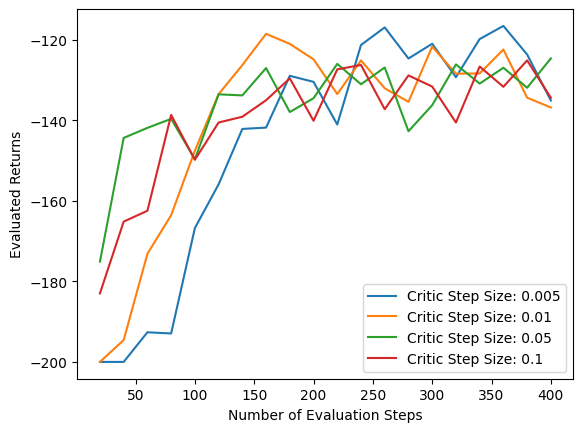

In [ ]:
if __name__ == "__main__":
    _Q3test()

In [ ]:
import numpy as np
from A2helpers import softplus

def betaPolicy1d(x, Theta, deterministic=False):
    """
    Calculate the action using Beta distribution.

    Input Parameters:
        x (numpy array): State features.
        Theta (numpy array): Parameters of the actor (Beta policy).
        deterministic (bool): Whether to return deterministic action or sample.

    Returns:
        float: Action sampled from or the mode of the Beta distribution.
    """
    # Extracting parameters

    theta_alpha, theta_beta = Theta[:, 0], Theta[:, 1]

    # Computing alpha and beta
    alpha = softplus(np.dot(theta_alpha, x.T)) + 1
    beta = softplus(np.dot(theta_beta, x.T)) + 1

    # Computing mode of the Beta distribution
    mode = (alpha - 1) / (alpha + beta - 2 + 1e-10)

    if deterministic:
        return mode #  deterministic=True means a is the mode of the Beta distribution
    else:
        return np.random.beta(alpha, beta) # deterministic=False means a is sampled from the Beta distribution


In [ ]:
import numpy as np
import scipy.special
from A2helpers import softplus


import numpy as np
import scipy.special
from A2helpers import softplusGrad

def logBetaPolicy1dGradient(x, a, Theta):
    # Extract parameters for alpha and beta
    theta_alpha, theta_beta = Theta[:, 0], Theta[:, 1]

    # Compute alpha and beta using softplus function
    alpha = softplus(np.dot(x.T , theta_alpha)) + 1
    beta = softplus(np.dot(x.T , theta_beta)) + 1

    # Compute the gradient of log probability w.r.t. alpha
    dig_alpha = scipy.special.digamma(alpha)
    dig_beta = scipy.special.digamma(beta)
    dig_a_b = scipy.special.digamma(alpha+beta)

    grad_alpha = (np.log(a + 1e-10) - dig_alpha + dig_a_b) * softplusGrad(np.dot(x.T, theta_alpha)) * x
    grad_beta = (np.log(1 - a + 1e-10) - dig_beta + dig_a_b) * softplusGrad(np.dot(x.T, theta_beta)) * x

    return np.column_stack((grad_alpha, grad_beta))


In [ ]:
def ActorCriticCont(env,
                    featurizer,
                    eval_func,
                    gamma = 0.99,
                    actor_step_size = 0.2,
                    critic_step_size = 0.2,
                    max_episodes=400,
                    evaluate_every=20):

    # Initialize actor parameters Theta and critic parameters w
    w = np.zeros(featurizer.n_features)  # Initialize critic parameters
    Theta = np.ones([featurizer.n_features, 2])  # Initialize actor parameters

    eval_returns = []

    for i in range(1, max_episodes + 1):
        s, info = env.reset()
        s = featurizer.featurize(s) # Featurize initial stater
        terminated = truncated = False
        actor_discount = 1

        while not (terminated or truncated):
            # Choose action using beta policy
            mu = np.dot(Theta.T, s)[0]  # mean of the beta distribution
            sigma = 1  # standard deviation (constant for simplicity)
            action = convert1dAction(env, betaPolicy1d(s, Theta, deterministic=True))  # convert 1D action to actual action



            # Take action, observe next state and reward
            s_prime, r, terminated, truncated, info = env.step(action)
            s_prime = featurizer.featurize(s_prime)

            # Compute TD error
            delta = r + gamma * np.dot(w, s_prime) - np.dot(w, s)

            # Update critic parameters w
            w += critic_step_size * delta * s

            # Update actor parameters Theta
            gradient_log_policy = logBetaPolicy1dGradient(s, action, Theta) * s
            Theta += actor_step_size * actor_discount * delta * gradient_log_policy[:, np.newaxis]

            s = s_prime
            actor_discount *= gamma

        if i % evaluate_every == 0:
            eval_return = eval_func(env, featurizer, Theta, betaPolicy1d)
            eval_returns.append(eval_return)

    return Theta, w, eval_returns
